In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv('nike_sales_2024.csv')
df

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160
...,...,...,...,...,...,...,...,...,...,...
995,October,India,Equipment,Accessories,Hats,Mid-Range,9870,987000,82,100
996,July,Europe,Equipment,Socks,Performance Socks,Mid-Range,14668,2640240,88,180
997,August,Japan,Footwear,Football,Phantom Vision,Premium,15078,2261700,74,150
998,May,South Korea,Equipment,Socks,Crew Socks,Premium,26242,1312100,52,50


In [6]:
df.describe(include='object')

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier
count,1000,1000,1000,1000,1000,1000
unique,12,7,3,11,24,3
top,December,Greater China,Equipment,Outerwear,Windrunner,Budget
freq,96,161,352,125,65,348


In [7]:
for c in df.describe(include='object').columns:
    print(c)
    print(df[c].unique())
    print('='*20)

Month
['November' 'January' 'October' 'December' 'May' 'July' 'April' 'February'
 'September' 'June' 'March' 'August']
Region
['India' 'Greater China' 'Japan' 'Europe' 'South Korea' 'America'
 'Southeast Asia']
Main_Category
['Equipment' 'Apparel' 'Footwear']
Sub_Category
['Bags' 'Accessories' 'Tops' 'Cricket' 'Socks' 'Performance' 'Outerwear'
 'Lifestyle' 'Running' 'Basketball' 'Football']
Product_Line
['Gym Sack' 'Hats' 'Tech Fleece' 'Vapor Cricket' 'Performance Socks'
 'Dri-FIT' 'Therma-FIT' 'Bags' 'Crew Socks' 'Backpack' 'Rain Jacket'
 'Air Force 1' 'React Infinity' 'Windrunner' 'Air Jordan'
 'Compression Wear' 'Air Zoom' 'Mercurial' 'Air Max' 'KD Series'
 'LeBron Series' 'Phantom Vision' 'Blazer' 'Pegasus']
Price_Tier
['Budget' 'Mid-Range' 'Premium']


In [8]:
df['Sub_Category'].value_counts(normalize='True')

,proportion
Sub_Category,
Outerwear,0.125
Accessories,0.123
Bags,0.116
Socks,0.113
Tops,0.109
Performance,0.109
Lifestyle,0.066
Football,0.063
Cricket,0.061


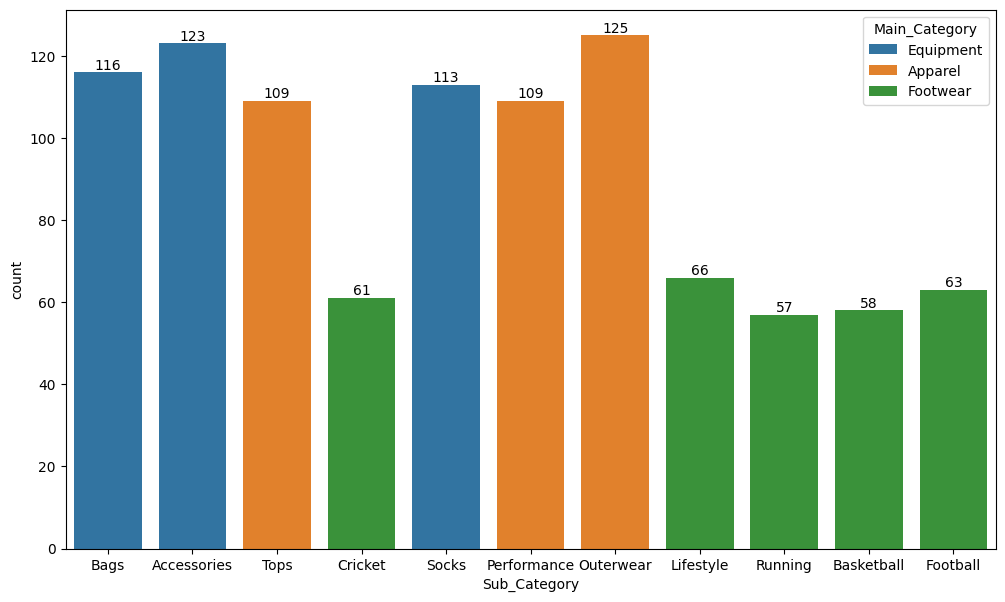

In [9]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax=sn.countplot(x='Sub_Category',hue='Main_Category',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

In [10]:
df.groupby(['Month'],as_index=False)['Revenue_USD'].sum().sort_values(by='Revenue_USD',ascending=False)

,Month,Revenue_USD
2,December,528213660
3,February,488131980
5,July,435709420
11,September,435333230
6,June,428850300
8,May,428032960
9,November,413401340
4,January,391634590
10,October,383481570
7,March,375540620


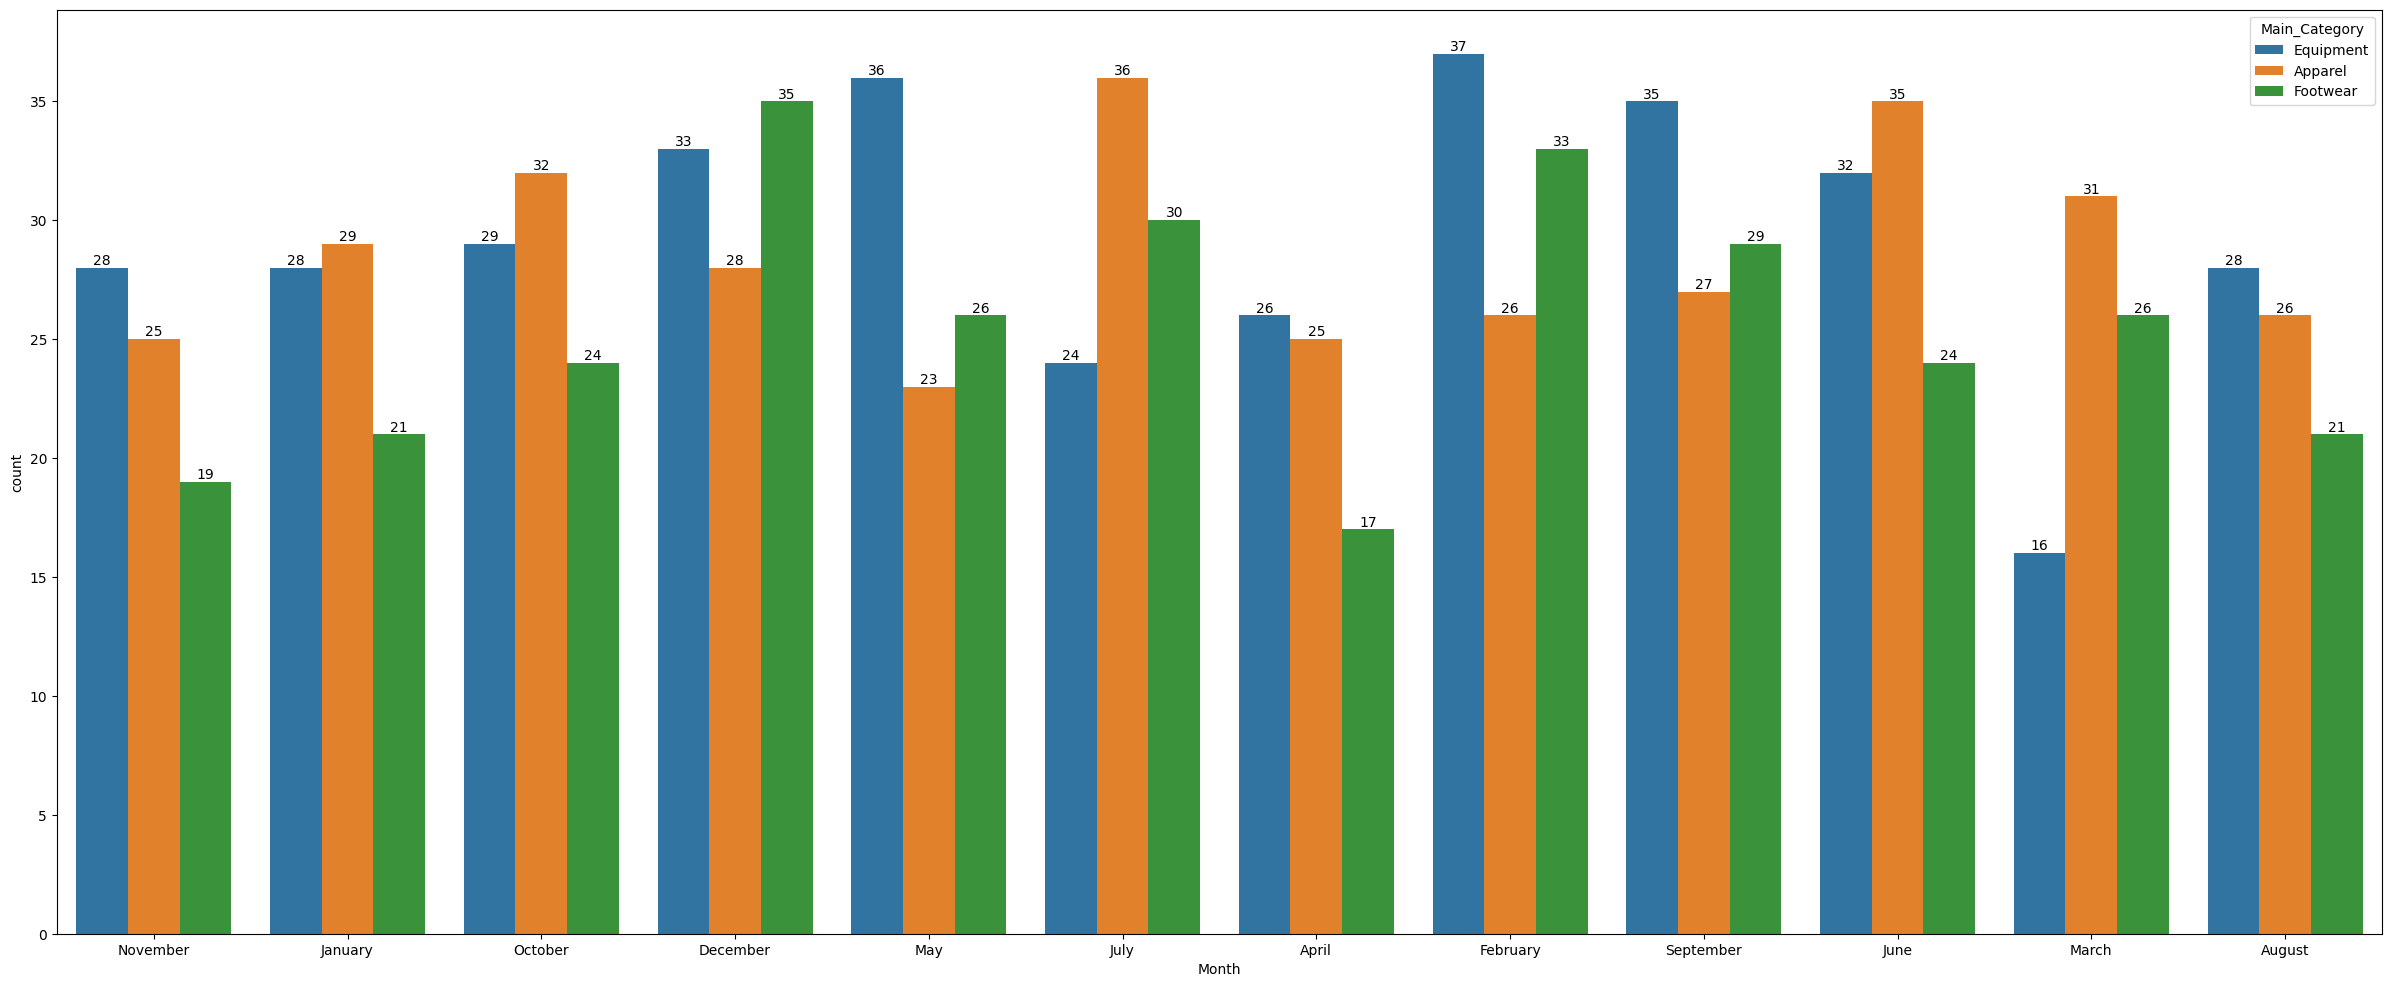

In [11]:
fig1, ax1 = plt.subplots(figsize=(30,12))
ax=sn.countplot(x='Month',hue='Main_Category',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

In [12]:
df.groupby(['Region'],as_index=False)['Revenue_USD'].sum().sort_values(by='Revenue_USD',ascending=False)

,Region,Revenue_USD
2,Greater China,804543630
4,Japan,788236410
0,America,784640550
3,India,743029330
5,South Korea,699019260
1,Europe,639991140
6,Southeast Asia,580116090


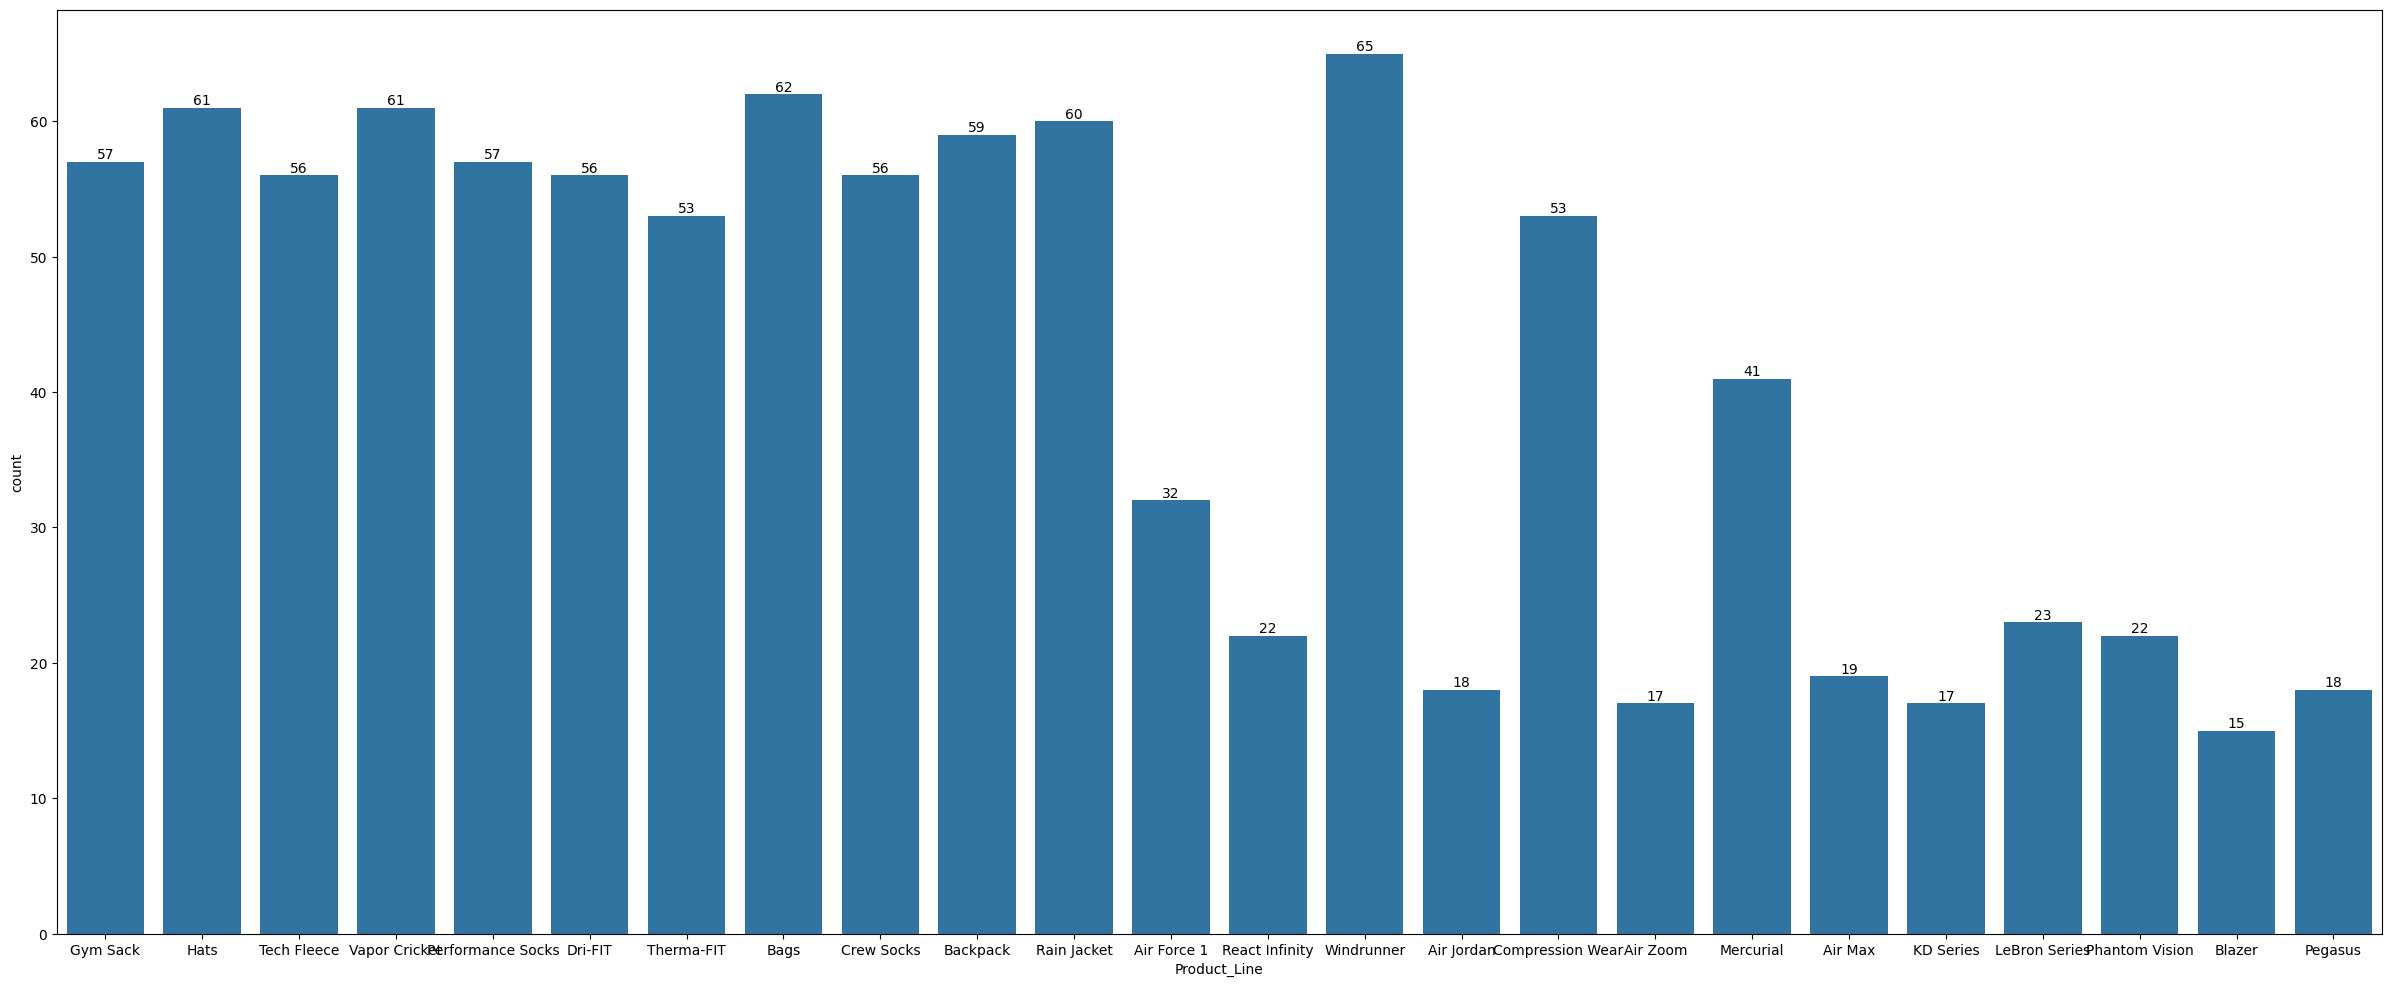

In [13]:
fig1, ax1 = plt.subplots(figsize=(30,12))
ax=sn.countplot(x='Product_Line',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

In [14]:
df.groupby(['Product_Line'],as_index=False)['Revenue_USD'].sum().sort_values(by='Revenue_USD',ascending=False)

,Product_Line,Revenue_USD
22,Vapor Cricket,384372340
23,Windrunner,363786150
18,Rain Jacket,355140730
10,Gym Sack,320009510
5,Bags,315192950
11,Hats,313999750
9,Dri-FIT,289443060
16,Performance Socks,277951090
8,Crew Socks,276739230
4,Backpack,273432860


In [15]:
from sklearn.preprocessing import LabelEncoder
le_Region=LabelEncoder()
le_month=LabelEncoder()
le_Product_Line=LabelEncoder()
le_Tier=LabelEncoder()

In [16]:
df['n_Region']=le_Region.fit_transform(df['Region'])
df['n_month']=le_month.fit_transform(df['Month'])
df['n_Product_Line']=le_Product_Line.fit_transform(df['Product_Line'])
df['n_Tier']=le_Tier.fit_transform(df['Price_Tier'])
df

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price,n_Region,n_month,n_Product_Line,n_Tier
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300,3,9,10,0
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210,3,4,11,0
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70,3,10,20,1
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210,2,2,22,2
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160,2,8,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,October,India,Equipment,Accessories,Hats,Mid-Range,9870,987000,82,100,3,10,11,1
996,July,Europe,Equipment,Socks,Performance Socks,Mid-Range,14668,2640240,88,180,1,5,16,1
997,August,Japan,Footwear,Football,Phantom Vision,Premium,15078,2261700,74,150,4,1,17,2
998,May,South Korea,Equipment,Socks,Crew Socks,Premium,26242,1312100,52,50,5,8,8,2


In [17]:
x=df.drop(['Month','Region','Main_Category','Sub_Category','Product_Line','Price_Tier','Revenue_USD'],axis='columns')
y=df.Revenue_USD

In [18]:
x

,Units_Sold,Online_Sales_Percentage,Retail_Price,n_Region,n_month,n_Product_Line,n_Tier
0,48356,73,300,3,9,10,0
1,9842,50,210,3,4,11,0
2,25079,90,70,3,10,20,1
3,41404,58,210,2,2,22,2
4,33569,53,160,2,8,16,2
...,...,...,...,...,...,...,...
995,9870,82,100,3,10,11,1
996,14668,88,180,1,5,16,1
997,15078,74,150,4,1,17,2
998,26242,52,50,5,8,8,2


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
model.score(x_test,y_test)

0.9134171562126994